### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Calcular la facturación total de cada tienda

facturacion_1 = sum(tienda['Precio'])
facturacion_2 = sum(tienda2['Precio'])
facturacion_3 = sum(tienda3['Precio'])
facturacion_4 = sum(tienda4['Precio'])

print(f'La facturación de la tienda 1 es de {facturacion_1:.0f}')
print(f'La facturación de la tienda 2 es de {facturacion_2:.0f}')
print(f'La facturación de la tienda 3 es de {facturacion_3:.0f}')
print(f'La facturación de la tienda 4 es de {facturacion_4:.0f}')

La facturación de la tienda 1 es de 1150880400
La facturación de la tienda 2 es de 1116343500
La facturación de la tienda 3 es de 1098019600
La facturación de la tienda 4 es de 1038375700


In [3]:
#Hacer un diccionario que tenga en las llaves el nombre de cada tienda y en la otra los valores de facturación
facturacion_total_tiendas = {'Tienda 1': facturacion_1, 'Tienda 2': facturacion_2, 'Tienda 3': facturacion_3, 'Tienda 4': facturacion_4}
facturacion_total_tiendas

{'Tienda 1': 1150880400.0,
 'Tienda 2': 1116343500.0,
 'Tienda 3': 1098019600.0,
 'Tienda 4': 1038375700.0}

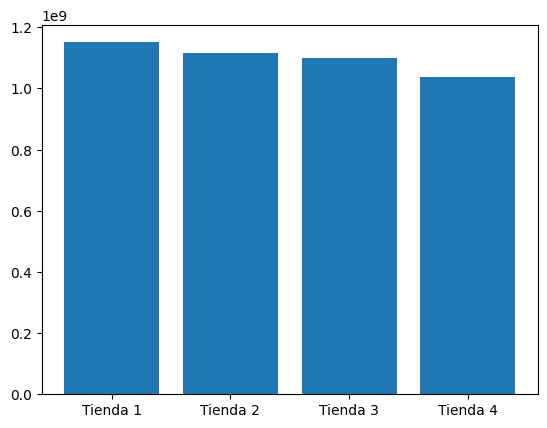

In [4]:
#Graficar el diccionario

from matplotlib import pyplot as plt
plt.bar(facturacion_total_tiendas.keys(), facturacion_total_tiendas.values())
plt.show()

In [5]:
#Función para extraer los años
def año(tienda):
  año_venta_tienda=[]
  for i in tienda.index:
    año = tienda.loc[i, 'Fecha de Compra'][6:10]
    año_venta_tienda.append(año)
  return año_venta_tienda

#Generar listas de los años de venta por cada tienda
años_t1= año(tienda)
años_t2= año(tienda2)
años_t3= año(tienda3)
años_t4= año(tienda4)


#Encontrar todos los años en que se ha vendido por cada una de las tiendas
años_venta1 = list(set(años_t1))
años_venta2 = list(set(años_t2))
años_venta3 = list(set(años_t3))
años_venta4 = list(set(años_t4))

print(años_venta1)
print(años_venta2)
print(años_venta3)
print(años_venta4)
#Al imprimir estas listas, los años son los mismos ['2020', '2021', '2022', '2023']
años_venta = ['2020', '2021', '2022', '2023']



['2023', '2020', '2021', '2022']
['2023', '2020', '2021', '2022']
['2022', '2020', '2021', '2023']
['2023', '2020', '2021', '2022']


In [6]:
#Transformar en lista la columna ventas de cada tienda
t1_lista_ventas= tienda['Precio'].tolist()
t2_lista_ventas= tienda2['Precio'].tolist()
t3_lista_ventas= tienda3['Precio'].tolist()
t4_lista_ventas= tienda4['Precio'].tolist()

In [7]:
#Crear una lista por cada tienda en que cada item de la lista sean las ventas totales del 2020, 2021, 2022 y 2023 respectivamente
def ventas_por_año (t1_lista_ventas,años_t1):
  total_ventas_año=[0,0,0,0]
  for i in range(len(t1_lista_ventas)):
    if años_t1[i] == "2020":
      total_ventas_año[0] += t1_lista_ventas[i]
    elif años_t1[i] == "2021":
      total_ventas_año[1] += t1_lista_ventas[i]
    elif años_t1[i] == "2022":
      total_ventas_año[2] += t1_lista_ventas[i]
    else:
      total_ventas_año[3] += t1_lista_ventas[i]
  return total_ventas_año



total_ventas_año_t1 = ventas_por_año(t1_lista_ventas,años_t1)
total_ventas_año_t2 = ventas_por_año(t2_lista_ventas,años_t2)
total_ventas_año_t3 = ventas_por_año(t3_lista_ventas,años_t3)
total_ventas_año_t4 = ventas_por_año(t4_lista_ventas,años_t4)

print(años_venta)
print(total_ventas_año_t1)
print(total_ventas_año_t2)
print(total_ventas_año_t3)
print(total_ventas_año_t4)

['2020', '2021', '2022', '2023']
[368933200.0, 362120800.0, 316565600.0, 103260800.0]
[320466600.0, 351215500.0, 358226500.0, 86434900.0]
[321707500.0, 362954400.0, 350438300.0, 62919400.0]
[330847700.0, 347823600.0, 302221500.0, 57482900.0]


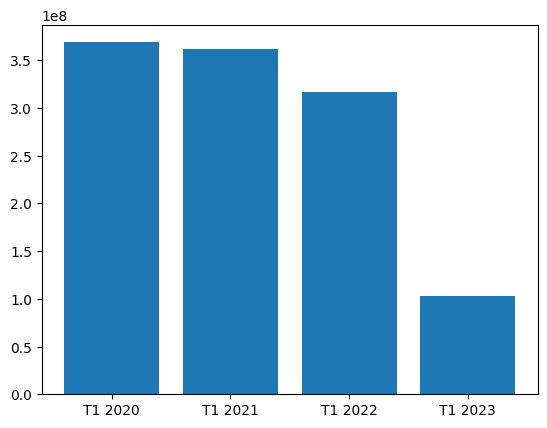

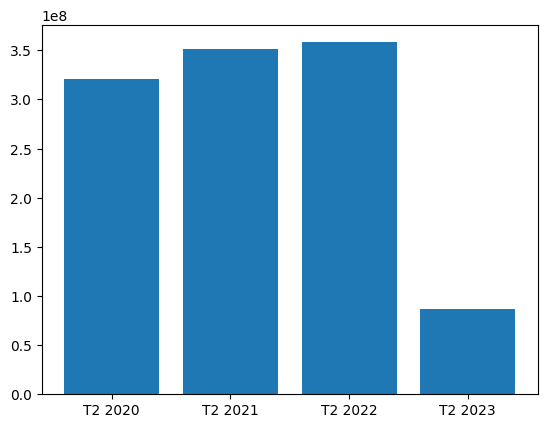

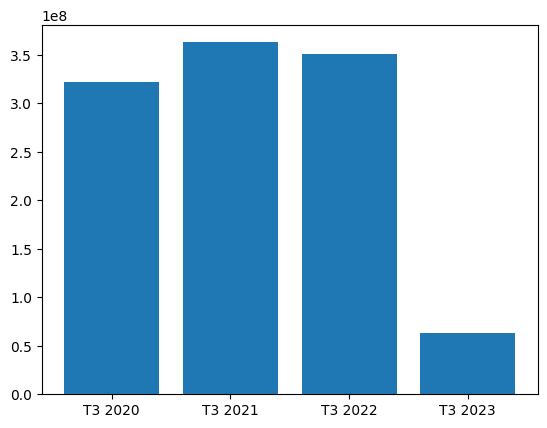

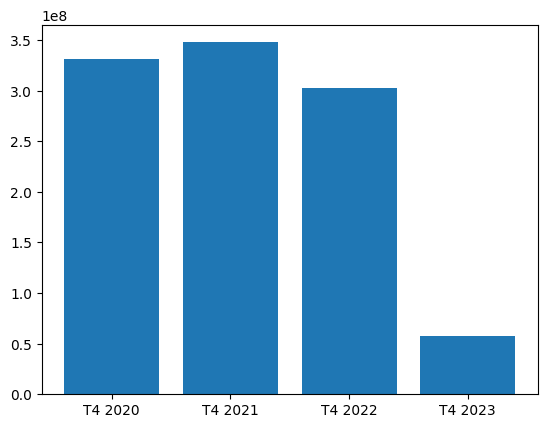

In [8]:
facturacion_por_añoT1 = {"T1 2020": total_ventas_año_t1[0], "T1 2021": total_ventas_año_t1[1], "T1 2022": total_ventas_año_t1[2], "T1 2023": total_ventas_año_t1[3]}
facturacion_por_añoT2 = {"T2 2020": total_ventas_año_t2[0], "T2 2021": total_ventas_año_t2[1], "T2 2022": total_ventas_año_t2[2], "T2 2023": total_ventas_año_t2[3]}
facturacion_por_añoT3 = {"T3 2020": total_ventas_año_t3[0], "T3 2021": total_ventas_año_t3[1], "T3 2022": total_ventas_año_t3[2], "T3 2023": total_ventas_año_t3[3]}
facturacion_por_añoT4 = {"T4 2020": total_ventas_año_t4[0], "T4 2021": total_ventas_año_t4[1], "T4 2022": total_ventas_año_t4[2], "T4 2023": total_ventas_año_t4[3]}

plt.bar(facturacion_por_añoT1.keys(), facturacion_por_añoT1.values())
plt.show()
plt.bar(facturacion_por_añoT2.keys(), facturacion_por_añoT2.values())
plt.show()
plt.bar(facturacion_por_añoT3.keys(), facturacion_por_añoT3.values())
plt.show()
plt.bar(facturacion_por_añoT4.keys(), facturacion_por_añoT4.values())
plt.show()

In [9]:
#En 2023, todas las tiendas disminuyeron drásticamente su facturación, vamos a entrar a investigar qué ocurrió en los meses del 2023
#Función para extraer los meses
def mes(tienda):
  mes_venta_tienda=[]
  for i in tienda.index:
    mes = tienda.loc[i, 'Fecha de Compra'][3:10]
    mes_venta_tienda.append(mes)
  return mes_venta_tienda

#Generar listas de los meses de 2023 de venta por cada tienda
meses_t1= mes(tienda)
meses_t2= mes(tienda2)
meses_t3= mes(tienda3)
meses_t4= mes(tienda4)

In [10]:
#Crear una lista por cada tienda en que cada item de la lista sean las ventas totales enero a diciembre de 2023 respectivamente
def ventas_por_mes2023 (t1_lista_ventas,meses_t1):
  total_ventas_mes2023=[0,0,0,0,0,0,0,0,0,0,0,0]
  for i in range(len(t1_lista_ventas)):
    if meses_t1[i] == "01/2023":
      total_ventas_mes2023[0] += t1_lista_ventas[i]
    elif meses_t1[i] == "02/2023":
      total_ventas_mes2023[1] += t1_lista_ventas[i]
    elif meses_t1[i] == "03/2023":
      total_ventas_mes2023[2] += t1_lista_ventas[i]
    elif meses_t1[i] == "04/2023":
      total_ventas_mes2023[3] += t1_lista_ventas[i]
    elif meses_t1[i] == "05/2023":
      total_ventas_mes2023[4] += t1_lista_ventas[i]
    elif meses_t1[i] == "06/2023":
      total_ventas_mes2023[5] += t1_lista_ventas[i]
    elif meses_t1[i] == "07/2023":
      total_ventas_mes2023[6] += t1_lista_ventas[i]
    elif meses_t1[i] == "08/2023":
      total_ventas_mes2023[7] += t1_lista_ventas[i]
    elif meses_t1[i] == "09/2023":
      total_ventas_mes2023[8] += t1_lista_ventas[i]
    elif meses_t1[i] == "10/2023":
      total_ventas_mes2023[9] += t1_lista_ventas[i]
    elif meses_t1[i] == "11/2023":
      total_ventas_mes2023[10] += t1_lista_ventas[i]
    elif meses_t1[i] == "12/2023":
      total_ventas_mes2023[11] += t1_lista_ventas[i]
  return total_ventas_mes2023

total_ventas_mes2023_t1 = ventas_por_mes2023(t1_lista_ventas,meses_t1)
total_ventas_mes2023_t2 = ventas_por_mes2023(t2_lista_ventas,meses_t2)
total_ventas_mes2023_t3 = ventas_por_mes2023(t3_lista_ventas,meses_t3)
total_ventas_mes2023_t4 = ventas_por_mes2023(t4_lista_ventas,meses_t4)

meses_venta2023= ['01/2023', '02/2023', '03/2023', '04/2023', '05/2023', '06/2023', '07/2023', '08/2023', '09/2023', '10/2023', '11/2023', '12/2023']

print(meses_venta2023)
print(total_ventas_mes2023_t1)
print(total_ventas_mes2023_t2)
print(total_ventas_mes2023_t3)
print(total_ventas_mes2023_t4)

['01/2023', '02/2023', '03/2023', '04/2023', '05/2023', '06/2023', '07/2023', '08/2023', '09/2023', '10/2023', '11/2023', '12/2023']
[28930100.0, 37227700.0, 37103000.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25150300.0, 34168800.0, 27115800.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22448900.0, 17752800.0, 22717700.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[19796800.0, 19652900.0, 18033200.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
#Vamos a calcular la media mensual histórica por cada tienda (de enero 2020 a marzo 2023 => 39 meses)

media_historica_T1 = round(facturacion_1/39)
media_historica_T2 = round(facturacion_2/39)
media_historica_T3 = round(facturacion_3/39)
media_historica_T4 = round(facturacion_4/39)

print(media_historica_T1)
print(media_historica_T2)
print(media_historica_T3)
print(media_historica_T4)

29509754
28624192
28154349
26625018


In [12]:
def media_mensual_2023(total_ventas_mes2023):
  media_mensual_2023 = sum(total_ventas_mes2023)/3
  media_mensual_2023 = round(media_mensual_2023)
  print(media_mensual_2023)
  return media_mensual_2023

media_mensual_2023_T1 = media_mensual_2023(total_ventas_mes2023_t1)
media_mensual_2023_T2 = media_mensual_2023(total_ventas_mes2023_t2)
media_mensual_2023_T3 = media_mensual_2023(total_ventas_mes2023_t3)
media_mensual_2023_T4 = media_mensual_2023(total_ventas_mes2023_t4)

34420267
28811633
20973133
19160967


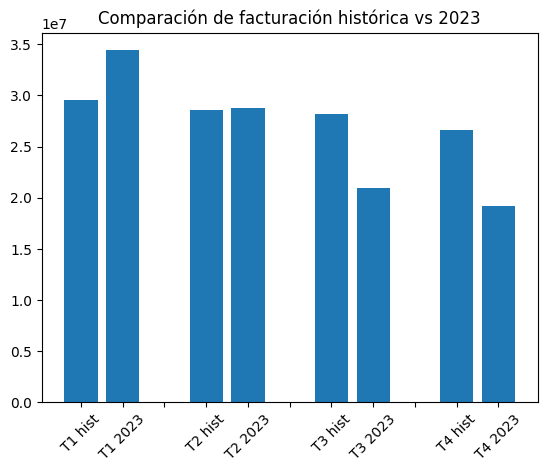

In [86]:
#Gráfico 1
comparacion = {"T1 hist" : media_historica_T1,
               "T1 2023": media_mensual_2023_T1,
               "":0,
               "T2 hist" : media_historica_T2,
               "T2 2023": media_mensual_2023_T2,
               " ":0,
               "T3 hist" : media_historica_T3,
               "T3 2023": media_mensual_2023_T3,
               "  ":0,
               "T4 hist" : media_historica_T4,
               "T4 2023": media_mensual_2023_T4,
               }

plt.bar(comparacion.keys(), comparacion.values())
plt.title('Comparación de facturación histórica vs 2023')
plt.xticks(rotation=45)
plt.show()

# 2. Ventas por categoría

In [14]:
#Primero tenemos que hacer una lista de las categorías vendidas por tienda

def categorias(tienda):
  t1_categorias= tienda['Categoría del Producto'].tolist()
  return t1_categorias


categorias_t1 = categorias(tienda)
categorias_t2 = categorias(tienda2)
categorias_t3 = categorias(tienda3)
categorias_t4 = categorias(tienda4)

In [15]:
#Filtrar las categorías para saber cuántas son
def categorias_unicas (categorias_t1):
  unicas_t1 = list(set(categorias_t1))
  return unicas_t1


categorias_unicas_t1 = categorias_unicas(categorias_t1)
categorias_unicas_t2 = categorias_unicas(categorias_t2)
categorias_unicas_t3 = categorias_unicas(categorias_t3)
categorias_unicas_t4 = categorias_unicas(categorias_t4)

print(categorias_unicas_t1)
print(categorias_unicas_t2)
print(categorias_unicas_t3)
print(categorias_unicas_t4)

['Muebles', 'Deportes y diversión', 'Electrónicos', 'Electrodomésticos', 'Juguetes', 'Instrumentos musicales', 'Libros', 'Artículos para el hogar']
['Muebles', 'Deportes y diversión', 'Electrónicos', 'Electrodomésticos', 'Juguetes', 'Instrumentos musicales', 'Libros', 'Artículos para el hogar']
['Muebles', 'Deportes y diversión', 'Electrónicos', 'Electrodomésticos', 'Juguetes', 'Instrumentos musicales', 'Libros', 'Artículos para el hogar']
['Muebles', 'Deportes y diversión', 'Electrónicos', 'Electrodomésticos', 'Juguetes', 'Instrumentos musicales', 'Libros', 'Artículos para el hogar']


In [16]:
#Vamos a analizar cuantas ventas se han hecho por categoría en cada tienda
ventas_por_categoria_t1 = {'Muebles':0, 'Libros':0, 'Instrumentos musicales':0, 'Deportes y diversión':0, 'Juguetes':0, 'Artículos para el hogar':0, 'Electrodomésticos':0, 'Electrónicos':0}
ventas_por_categoria_t2 = {'Muebles':0, 'Libros':0, 'Instrumentos musicales':0, 'Deportes y diversión':0, 'Juguetes':0, 'Artículos para el hogar':0, 'Electrodomésticos':0, 'Electrónicos':0}
ventas_por_categoria_t3 = {'Muebles':0, 'Libros':0, 'Instrumentos musicales':0, 'Deportes y diversión':0, 'Juguetes':0, 'Artículos para el hogar':0, 'Electrodomésticos':0, 'Electrónicos':0}
ventas_por_categoria_t4 = {'Muebles':0, 'Libros':0, 'Instrumentos musicales':0, 'Deportes y diversión':0, 'Juguetes':0, 'Artículos para el hogar':0, 'Electrodomésticos':0, 'Electrónicos':0}

def ventas_por_categoria (categorias_t1, ventas_por_categoria_t1):
  for i in range(len(categorias_t1)):
    if categorias_t1[i] == 'Muebles':
      ventas_por_categoria_t1['Muebles'] += 1
    elif categorias_t1[i] == 'Libros':
      ventas_por_categoria_t1['Libros'] += 1
    elif categorias_t1[i] == 'Instrumentos musicales':
      ventas_por_categoria_t1['Instrumentos musicales'] += 1
    elif categorias_t1[i] == 'Deportes y diversión':
      ventas_por_categoria_t1['Deportes y diversión'] += 1
    elif categorias_t1[i] == 'Juguetes':
      ventas_por_categoria_t1['Juguetes'] += 1
    elif categorias_t1[i] == 'Artículos para el hogar':
      ventas_por_categoria_t1['Artículos para el hogar'] += 1
    elif categorias_t1[i] == 'Electrodomésticos':
      ventas_por_categoria_t1['Electrodomésticos'] += 1
    elif categorias_t1[i] == 'Electrónicos':
      ventas_por_categoria_t1['Electrónicos'] += 1
  return ventas_por_categoria_t1

In [17]:
#Crear diccionario para la cadena completa y cada una de las tiendas donde las llaves son las categorías y los valores son los productos vendidos por cada categoría
ventas_por_categoria_t1 = ventas_por_categoria(categorias_t1, ventas_por_categoria_t1)
ventas_por_categoria_t2 = ventas_por_categoria(categorias_t2, ventas_por_categoria_t2)
ventas_por_categoria_t3 = ventas_por_categoria(categorias_t3, ventas_por_categoria_t3)
ventas_por_categoria_t4 = ventas_por_categoria(categorias_t4, ventas_por_categoria_t4)
ventas_por_categoria_totales = {"Muebles": ventas_por_categoria_t1["Muebles"] + ventas_por_categoria_t2["Muebles"] + ventas_por_categoria_t3["Muebles"] + ventas_por_categoria_t4["Muebles"],
                                "Libros": ventas_por_categoria_t1["Libros"] + ventas_por_categoria_t2["Libros"] + ventas_por_categoria_t3["Libros"] + ventas_por_categoria_t4["Libros"],
                                "Instrumentos musicales": ventas_por_categoria_t1["Instrumentos musicales"] + ventas_por_categoria_t2["Instrumentos musicales"] + ventas_por_categoria_t3["Instrumentos musicales"] + ventas_por_categoria_t4["Instrumentos musicales"],
                                "Deportes y diversión": ventas_por_categoria_t1["Deportes y diversión"] + ventas_por_categoria_t2["Deportes y diversión"] + ventas_por_categoria_t3["Deportes y diversión"] + ventas_por_categoria_t4["Deportes y diversión"],
                                "Juguetes": ventas_por_categoria_t1["Juguetes"] + ventas_por_categoria_t2["Juguetes"] + ventas_por_categoria_t3["Juguetes"] + ventas_por_categoria_t4["Juguetes"],
                                "Artículos para el hogar": ventas_por_categoria_t1["Artículos para el hogar"] + ventas_por_categoria_t2["Artículos para el hogar"] + ventas_por_categoria_t3["Artículos para el hogar"] + ventas_por_categoria_t4["Artículos para el hogar"],
                                "Electrodomésticos": ventas_por_categoria_t1["Electrodomésticos"] + ventas_por_categoria_t2["Electrodomésticos"] + ventas_por_categoria_t3["Electrodomésticos"] + ventas_por_categoria_t4["Electrodomésticos"],
                                "Electrónicos": ventas_por_categoria_t1["Electrónicos"] + ventas_por_categoria_t2["Electrónicos"] + ventas_por_categoria_t3["Electrónicos"] + ventas_por_categoria_t4["Electrónicos"]
                                }

print(ventas_por_categoria_totales)

print(ventas_por_categoria_t1)
print(ventas_por_categoria_t2)
print(ventas_por_categoria_t3)
print(ventas_por_categoria_t4)

{'Muebles': 1886, 'Libros': 742, 'Instrumentos musicales': 753, 'Deportes y diversión': 1113, 'Juguetes': 1290, 'Artículos para el hogar': 730, 'Electrodomésticos': 1149, 'Electrónicos': 1772}
{'Muebles': 465, 'Libros': 173, 'Instrumentos musicales': 182, 'Deportes y diversión': 284, 'Juguetes': 324, 'Artículos para el hogar': 171, 'Electrodomésticos': 312, 'Electrónicos': 448}
{'Muebles': 442, 'Libros': 197, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Juguetes': 313, 'Artículos para el hogar': 181, 'Electrodomésticos': 305, 'Electrónicos': 422}
{'Muebles': 499, 'Libros': 185, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Electrodomésticos': 278, 'Electrónicos': 451}
{'Muebles': 480, 'Libros': 187, 'Instrumentos musicales': 170, 'Deportes y diversión': 277, 'Juguetes': 338, 'Artículos para el hogar': 201, 'Electrodomésticos': 254, 'Electrónicos': 451}


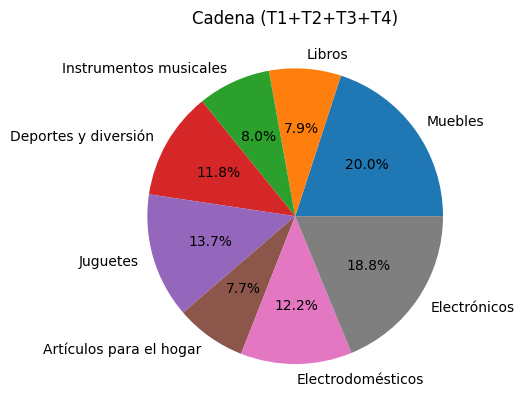

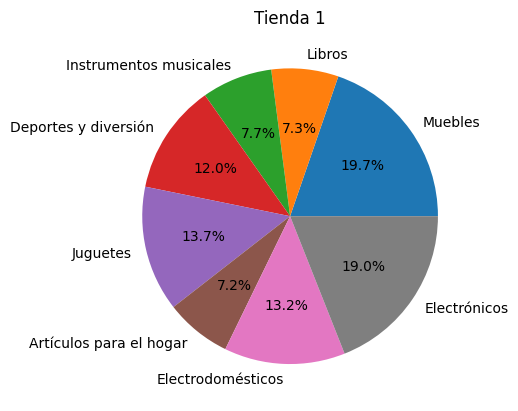

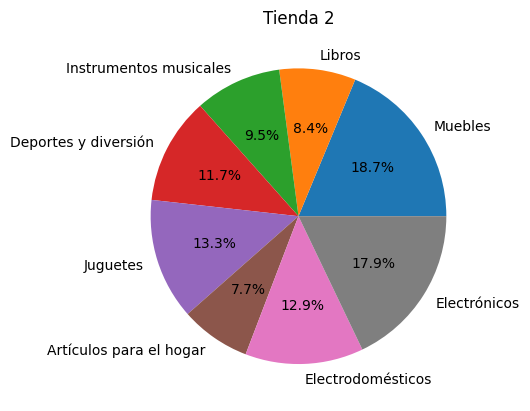

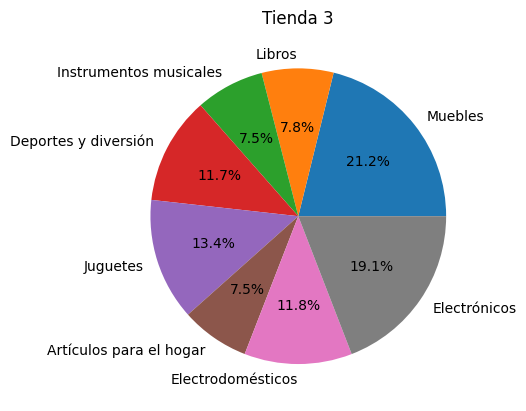

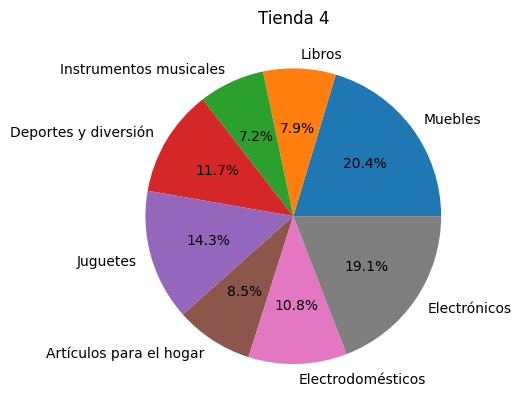

In [18]:
#Hacer gráfico de torta para las categorías de cada tienda y la cadena en todal
#Gráficos 2
def grafico_torta(ventas_por_categoria_t1, Tienda):
  etiquetas = ventas_por_categoria_t1.keys()
  valores = ventas_por_categoria_t1.values()
  plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
  plt.title(Tienda)
  plt.show()

grafico_torta(ventas_por_categoria_totales, "Cadena (T1+T2+T3+T4)")
grafico_torta(ventas_por_categoria_t1, "Tienda 1")
grafico_torta(ventas_por_categoria_t2, "Tienda 2")
grafico_torta(ventas_por_categoria_t3, "Tienda 3")
grafico_torta(ventas_por_categoria_t4, "Tienda 4")

In [19]:
# Ordenar los diccionarios de acuerdo a los valores de mayor a menor

def populares (ventas_por_categoria):
  ventas_cat_cadena_ord = dict(sorted(ventas_por_categoria.items(), key=lambda item: item[1], reverse=True))
  tres_populares_cadena = {list(ventas_cat_cadena_ord.keys())[0] : f"{((list(ventas_cat_cadena_ord.values())[0]/sum(list(ventas_cat_cadena_ord.values())))*100):.1f}%",
                          list(ventas_cat_cadena_ord.keys())[1] : f"{((list(ventas_cat_cadena_ord.values())[1]/sum(list(ventas_cat_cadena_ord.values())))*100):.1f}%",
                          list(ventas_cat_cadena_ord.keys())[2] : f"{((list(ventas_cat_cadena_ord.values())[2]/sum(list(ventas_cat_cadena_ord.values())))*100):.1f}%"
                          }
  return tres_populares_cadena

tres_populares_cadena = populares(ventas_por_categoria_totales)
tres_populares_T1 = populares(ventas_por_categoria_t1)
tres_populares_T2 = populares(ventas_por_categoria_t2)
tres_populares_T3 = populares(ventas_por_categoria_t3)
tres_populares_T4 = populares(ventas_por_categoria_t4)

print(f"El porcentaje de ventas de las categorías más populares de la cadena  es {tres_populares_cadena}")
print(f"El porcentaje de ventas de las categorías más populares de la tienda 1 es {tres_populares_T1}")
print(f"El porcentaje de ventas de las categorías más populares de la tienda 2 es {tres_populares_T2}")
print(f"El porcentaje de ventas de las categorías más populares de la tienda 3 es {tres_populares_T3}")
print(f"El porcentaje de ventas de las categorías más populares de la tienda 4 es {tres_populares_T4}")

El porcentaje de ventas de las categorías más populares de la cadena  es {'Muebles': '20.0%', 'Electrónicos': '18.8%', 'Juguetes': '13.7%'}
El porcentaje de ventas de las categorías más populares de la tienda 1 es {'Muebles': '19.7%', 'Electrónicos': '19.0%', 'Juguetes': '13.7%'}
El porcentaje de ventas de las categorías más populares de la tienda 2 es {'Muebles': '18.7%', 'Electrónicos': '17.9%', 'Juguetes': '13.3%'}
El porcentaje de ventas de las categorías más populares de la tienda 3 es {'Muebles': '21.2%', 'Electrónicos': '19.1%', 'Juguetes': '13.4%'}
El porcentaje de ventas de las categorías más populares de la tienda 4 es {'Muebles': '20.4%', 'Electrónicos': '19.1%', 'Juguetes': '14.3%'}


# 3. Calificación promedio de la tienda


In [20]:
#Primero tenemos que hacer una lista de las calificaciones por tienda
def calificaciones(tienda):
  t1_calificaciones= tienda['Calificación'].tolist()
  return t1_calificaciones

calificaciones_t1 = calificaciones(tienda)
calificaciones_t2 = calificaciones(tienda2)
calificaciones_t3 = calificaciones(tienda3)
calificaciones_t4 = calificaciones(tienda4)

#Averiguar cuál es la máxima calificación
maxima_calificacion_t1 = max(calificaciones_t1)
maxima_calificacion_t2 = max(calificaciones_t2)
maxima_calificacion_t3 = max(calificaciones_t3)
maxima_calificacion_t4 = max(calificaciones_t4)
print(maxima_calificacion_t1)
print(maxima_calificacion_t2)
print(maxima_calificacion_t3)
print(maxima_calificacion_t4)

5
5
5
5


In [21]:
#Vamos a calcular la media histórica de calificaciones de cada tienda

media_calificaciones_T1 = round((sum(calificaciones_t1)/len(calificaciones_t1)),2)
media_calificaciones_T2 = round((sum(calificaciones_t2)/len(calificaciones_t2)),2)
media_calificaciones_T3 = round((sum(calificaciones_t3)/len(calificaciones_t3)),2)
media_calificaciones_T4 = round((sum(calificaciones_t4)/len(calificaciones_t4)),2)

print(f"La media histórica de calificaciones de la tienda 1 fue de: {media_calificaciones_T1} puntos")
print(f"La media histórica de calificaciones de la tienda 2 fue de: {media_calificaciones_T2} puntos")
print(f"La media histórica de calificaciones de la tienda 3 fue de: {media_calificaciones_T3} puntos")
print(f"La media histórica de calificaciones de la tienda 4 fue de: {media_calificaciones_T4} puntos")

La media histórica de calificaciones de la tienda 1 fue de: 3.98 puntos
La media histórica de calificaciones de la tienda 2 fue de: 4.04 puntos
La media histórica de calificaciones de la tienda 3 fue de: 4.05 puntos
La media histórica de calificaciones de la tienda 4 fue de: 4.0 puntos


In [22]:
#Crear una lista solo con las calificaciones de cada mes de 2023 oir cada tienda

def calificaciones_2023 (calificaciones_t,años_t):
  calificaciones_2023=[]
  for i in range(len(calificaciones_t)):
    if años_t[i] == "2023":
      calificaciones_2023.append(calificaciones_t[i])
  return calificaciones_2023

calificaciones_2023_T1 = calificaciones_2023(calificaciones_t1,años_t1)
calificaciones_2023_T2 = calificaciones_2023(calificaciones_t2,años_t2)
calificaciones_2023_T3 = calificaciones_2023(calificaciones_t3,años_t3)
calificaciones_2023_T4 = calificaciones_2023(calificaciones_t4,años_t4)

In [23]:
#Calcular la media de calificaciones del año 2023

media_calificaciones_2023_T1 = round((sum(calificaciones_2023_T1)/len(calificaciones_2023_T1)),2)
media_calificaciones_2023_T2 = round((sum(calificaciones_2023_T2)/len(calificaciones_2023_T2)),2)
media_calificaciones_2023_T3 = round((sum(calificaciones_2023_T3)/len(calificaciones_2023_T3)),2)
media_calificaciones_2023_T4 = round((sum(calificaciones_2023_T4)/len(calificaciones_2023_T4)),2)

print(f"La media de calificaciones de la tienda 1 en 2023 fue de: {media_calificaciones_2023_T1} puntos")
print(f"La media de calificaciones de la tienda 2 en 2023 fue de: {media_calificaciones_2023_T2} puntos")
print(f"La media de calificaciones de la tienda 3 en 2023 fue de: {media_calificaciones_2023_T3} puntos")
print(f"La media de calificaciones de la tienda 4 en 2023 fue de: {media_calificaciones_2023_T4} puntos")

La media de calificaciones de la tienda 1 en 2023 fue de: 3.96 puntos
La media de calificaciones de la tienda 2 en 2023 fue de: 3.96 puntos
La media de calificaciones de la tienda 3 en 2023 fue de: 4.08 puntos
La media de calificaciones de la tienda 4 en 2023 fue de: 4.17 puntos


{'T1 hist': 3.98, 'T1 2023': 3.96, '': 0, 'T2 hist': 4.04, 'T2 2023': 3.96, ' ': 0, 'T3 hist': 4.05, 'T3 2023': 4.08, '  ': 0, 'T4 hist': 4.0, 'T4 2023': 4.17}


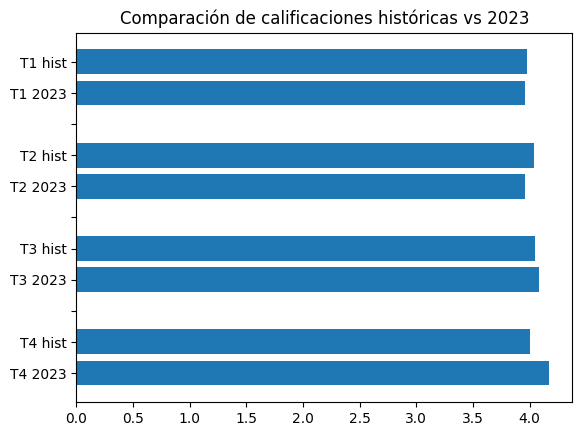

In [24]:
# Crear un diccionario con la media de calificaciones histórica y la media de 2023
#Gráfico 3

comparacion_calificaciones =  {"T1 hist" : media_calificaciones_T1,
                                "T1 2023": media_calificaciones_2023_T1,
                                "":0,
                                "T2 hist" : media_calificaciones_T2,
                                "T2 2023": media_calificaciones_2023_T2,
                                " ":0,
                                "T3 hist" : media_calificaciones_T3,
                                "T3 2023": media_calificaciones_2023_T3,
                                "  ":0,
                                "T4 hist" : media_calificaciones_T4,
                                "T4 2023": media_calificaciones_2023_T4,
                                }

print(comparacion_calificaciones)
plt.barh(list(comparacion_calificaciones.keys()), list(comparacion_calificaciones.values()))
plt.title('Comparación de calificaciones históricas vs 2023')
plt.gca().invert_yaxis()
plt.show()

T1: disminuyó en 0.02 puntos

T2: disminuyó en 0.08 puntos --> Peor disminución

T3: aumentó   en 0.03 puntos

T4: aumentó   en 0.17 puntos --> Mayor aumento


T1 2023: 3.96 --> Peor calificación

T2 2023: 3.96 --> Peor calificación

T3 2023: 4.08

T4 2023: 4.17 --> Mejor calificación

# 4. Productos más y menos vendidos

In [25]:
#Primero tenemos que hacer una lista de los productos vendidos por tienda

def productos(tienda):
  productos_t = tienda['Producto'].tolist()
  return productos_t


productos_t1 = productos(tienda)
productos_t2 = productos(tienda2)
productos_t3 = productos(tienda3)
productos_t4 = productos(tienda4)

In [26]:
#Filtrar los productos para saber cuántos son
def productos_unicos (productos_t):
  p_unicos_t = list(set(productos_t))
  p_unicos_t.sort()
  return p_unicos_t

p_unicos_t1 = productos_unicos(productos_t1)
p_unicos_t2 = productos_unicos(productos_t2)
p_unicos_t3 = productos_unicos(productos_t3)
p_unicos_t4 = productos_unicos(productos_t4)

print(p_unicos_t1)
print(p_unicos_t2)
print(p_unicos_t3)
print(p_unicos_t4)

len(p_unicos_t1)

['Ajedrez de madera', 'Armario', 'Asistente virtual', 'Auriculares', 'Auriculares con micrófono', 'Balón de baloncesto', 'Balón de voleibol', 'Batería', 'Bicicleta', 'Bloques de construcción', 'Cama box', 'Cama king', 'Carrito de control remoto', 'Celular ABXY', 'Ciencia de datos con Python', 'Cubertería', 'Cubo mágico 8x8', 'Cuerda para saltar', 'Dashboards con Power BI', 'Dinosaurio Rex', 'Estufa', 'Guitarra acústica', 'Guitarra eléctrica', 'Impresora', 'Iniciando en programación', 'Iphone 15', 'Juego de mesa', 'Kit de bancas', 'Lavadora de ropa', 'Lavavajillas', 'Mesa de centro', 'Mesa de comedor', 'Mesa de noche', 'Microondas', 'Mochila', 'Modelado predictivo', 'Muñeca bebé', 'Olla de presión', 'Pandereta', 'Refrigerador', 'Secadora de ropa', 'Set de ollas', 'Set de vasos', 'Silla de oficina', 'Sillón', 'Smart TV', 'Smartwatch', 'Sofá reclinable', 'TV LED UHD 4K', 'Tablet ABXY', 'Vaso térmico']
['Ajedrez de madera', 'Armario', 'Asistente virtual', 'Auriculares', 'Auriculares con mi

51

In [27]:
#Determinar cuántos de cada productos se han vendido en cada tienda

def ventas_producto_t (p_unicos):
  ventas_producto = [0]
  for i in range (len(p_unicos)):
    ventas_producto.append(0)
  return ventas_producto

ventas_producto_t1 = ventas_producto_t(p_unicos_t1)
ventas_producto_t2 = ventas_producto_t(p_unicos_t2)
ventas_producto_t3 = ventas_producto_t(p_unicos_t3)
ventas_producto_t4 = ventas_producto_t(p_unicos_t4)



In [28]:
#Crear una lista para cada tienda con las ventas totales de cada producto

def ventas_por_producto (productos_t, p_unicos_t, ventas_producto_t):
  for i in range(len(productos_t)):
    for f in range(len(p_unicos_t)):
      if productos_t[i] == p_unicos_t [f]:
        ventas_producto_t[f] += 1
  return ventas_producto_t

ventas_producto_t1 = ventas_por_producto(productos_t1, p_unicos_t1, ventas_producto_t1)
ventas_producto_t2 = ventas_por_producto(productos_t2, p_unicos_t2, ventas_producto_t2)
ventas_producto_t3 = ventas_por_producto(productos_t3, p_unicos_t3, ventas_producto_t3)
ventas_producto_t4 = ventas_por_producto(productos_t4, p_unicos_t4, ventas_producto_t4)

print(ventas_producto_t1)
print(ventas_producto_t2)
print(ventas_producto_t3)
print(ventas_producto_t4)


[49, 60, 40, 50, 33, 55, 42, 53, 54, 56, 44, 44, 52, 33, 39, 52, 44, 40, 42, 40, 45, 46, 47, 54, 41, 49, 43, 44, 47, 48, 44, 40, 56, 60, 39, 51, 40, 35, 36, 54, 58, 43, 41, 46, 41, 44, 43, 46, 60, 42, 54, 0]
[45, 54, 38, 37, 44, 42, 46, 61, 45, 54, 47, 45, 47, 41, 43, 39, 45, 50, 43, 42, 42, 58, 47, 34, 65, 55, 32, 45, 49, 46, 45, 34, 44, 62, 45, 46, 48, 44, 58, 49, 57, 52, 46, 49, 35, 40, 44, 44, 45, 44, 47, 0]
[47, 49, 39, 43, 39, 50, 48, 41, 52, 35, 46, 56, 52, 44, 46, 39, 44, 53, 40, 46, 53, 47, 38, 50, 46, 46, 52, 57, 42, 52, 42, 56, 55, 36, 36, 53, 39, 47, 51, 50, 45, 55, 36, 46, 47, 54, 46, 45, 42, 48, 38, 0]
[39, 34, 50, 44, 42, 50, 48, 48, 45, 54, 62, 56, 55, 39, 38, 59, 47, 43, 56, 47, 47, 37, 33, 50, 43, 48, 48, 42, 38, 43, 44, 55, 55, 48, 43, 50, 48, 46, 52, 38, 40, 50, 46, 40, 45, 54, 39, 47, 40, 45, 48, 0]


In [29]:
#Crear una lista con el total de productos vendidos por la cadena
ventas_cadena = []
for i in range(len(ventas_producto_t1)):
  ventas_cadena.append(ventas_producto_t1[i] + ventas_producto_t2[i] + ventas_producto_t3[i] + ventas_producto_t4[i])

In [30]:
#Crear un diccionario con las llaves de los nombres de los productos y los valores con el total de productos vendidos por cada ítem por tienda
prod_vendidos_t1 = dict(zip(p_unicos_t1, ventas_producto_t1))
prod_vendidos_t2 = dict(zip(p_unicos_t2, ventas_producto_t2))
prod_vendidos_t3 = dict(zip(p_unicos_t3, ventas_producto_t3))
prod_vendidos_t4 = dict(zip(p_unicos_t4, ventas_producto_t4))
prod_vendidos_cadena = dict(zip(p_unicos_t1, ventas_cadena))

In [59]:
#Crear un diccionario con los productos más vendidos por tienda y cadena
top_5_T1 = dict(sorted(prod_vendidos_t1.items(), key=lambda item: item[1], reverse=True)[:5])
top_5_T2 = dict(sorted(prod_vendidos_t2.items(), key=lambda item: item[1], reverse=True)[:5])
top_5_T3 = dict(sorted(prod_vendidos_t3.items(), key=lambda item: item[1], reverse=True)[:5])
top_5_T4 = dict(sorted(prod_vendidos_t4.items(), key=lambda item: item[1], reverse=True)[:5])
top_5_cadena = dict(sorted(prod_vendidos_cadena.items(), key=lambda item: item[1], reverse=True)[:5])


print(f"Los productos más vendios por la cadena son {list(top_5_cadena.keys())}")
print(f"Los productos más vendios por la tienda 1 son {list(top_5_T1.keys())}")
print(f"Los productos más vendios por la tienda 2 son {list(top_5_T2.keys())}")
print(f"Los productos más vendios por la tienda 3 son {list(top_5_T3.keys())}")
print(f"Los productos más vendios por la tienda 4 son {list(top_5_T4.keys())}")

Los productos más vendios por la cadena son ['Mesa de noche', 'Carrito de control remoto', 'Microondas', 'Batería', 'Cama king']
Los productos más vendios por la tienda 1 son ['Armario', 'Microondas', 'TV LED UHD 4K', 'Secadora de ropa', 'Bloques de construcción']
Los productos más vendios por la tienda 2 son ['Iniciando en programación', 'Microondas', 'Batería', 'Guitarra acústica', 'Pandereta']
Los productos más vendios por la tienda 3 son ['Kit de bancas', 'Cama king', 'Mesa de comedor', 'Mesa de noche', 'Set de ollas']
Los productos más vendios por la tienda 4 son ['Cama box', 'Cubertería', 'Cama king', 'Dashboards con Power BI', 'Carrito de control remoto']


In [60]:
#Crear un diccionario con los productos menos vendidos por tienda
top_menos5_T1 = dict(sorted(prod_vendidos_t1.items(), key=lambda item: item[1], reverse=True)[-5:])
top_menos5_T2 = dict(sorted(prod_vendidos_t2.items(), key=lambda item: item[1], reverse=True)[-5:])
top_menos5_T3 = dict(sorted(prod_vendidos_t3.items(), key=lambda item: item[1], reverse=True)[-5:])
top_menos5_T4 = dict(sorted(prod_vendidos_t4.items(), key=lambda item: item[1], reverse=True)[-5:])
top_menos5_cadena = dict(sorted(prod_vendidos_cadena.items(), key=lambda item: item[1], reverse=True)[-5:])


print(f"Los productos menos vendios por la cadena son {list(top_menos5_T1.keys())}")
print(f"Los productos menos vendios por la tienda 1 son {list(top_menos5_T1.keys())}")
print(f"Los productos menos vendios por la tienda 2 son {list(top_menos5_T2.keys())}")
print(f"Los productos menos vendios por la tienda 3 son {list(top_menos5_T3.keys())}")
print(f"Los productos menos vendios por la tienda 4 son {list(top_menos5_T4.keys())}")

Los productos menos vendios por la cadena son ['Mochila', 'Pandereta', 'Olla de presión', 'Auriculares con micrófono', 'Celular ABXY']
Los productos menos vendios por la tienda 1 son ['Mochila', 'Pandereta', 'Olla de presión', 'Auriculares con micrófono', 'Celular ABXY']
Los productos menos vendios por la tienda 2 son ['Auriculares', 'Sillón', 'Impresora', 'Mesa de comedor', 'Juego de mesa']
Los productos menos vendios por la tienda 3 son ['Vaso térmico', 'Microondas', 'Mochila', 'Set de vasos', 'Bloques de construcción']
Los productos menos vendios por la tienda 4 son ['Lavadora de ropa', 'Refrigerador', 'Guitarra acústica', 'Armario', 'Guitarra eléctrica']


In [64]:
#De los productos más populares de la cadena, ver cuánto vende cada tienda

def populares_por_tienda (p_unicos_t, ventas_producto_t):
  top_5_enT = 0
  for i in range(len(p_unicos_t1)):
    for f in range(len(top_5_cadena)):
      if p_unicos_t[i] == list(top_5_cadena.keys())[f]:
        top_5_enT += ventas_producto_t[i]
  return top_5_enT

top_5_T1 = populares_por_tienda(p_unicos_t1, ventas_producto_t1)
top_5_T2 = populares_por_tienda(p_unicos_t2, ventas_producto_t2)
top_5_T3 = populares_por_tienda(p_unicos_t3, ventas_producto_t3)
top_5_T4 = populares_por_tienda(p_unicos_t4, ventas_producto_t4)
total_populares_cadena = sum(list(top_5_cadena.values()))

print(total_populares_cadena)
print(top_5_T1)
print(top_5_T2)
print(top_5_T3)
print(top_5_T4)

1026
265
259
240
262


In [69]:
#¿Qué porcentaje de los productos más populares de la cadena vende cada tienda?
print(f"De los productos más populares de la cadena, la tienda 1 vende el {(top_5_T1/total_populares_cadena)*100:.2f}%, la tienda 2 vende el {(top_5_T2/total_populares_cadena)*100:.2f}%, la tienda 3 vende el {(top_5_T3/total_populares_cadena)*100:.2f}% y la tienda 4 vende el {(top_5_T4/total_populares_cadena)*100:.2f}%")

De los productos más populares de la cadena, la tienda 1 vende el 25.83%, la tienda 2 vende el 25.24%, la tienda 3 vende el 23.39% y la tienda 4 vende el 25.54%


Hay que conservar la tienda que venda más de los productos populares, ya que hay que fortalecer la venta de los productos por los cuales podemos comprar mayor volumen, ya que esto nos permite negociar con los proveedores precios más bajos por compras de mayor volumen.

# 5. Envío promedio por tienda

In [33]:
#Ver cuál es la que gasta más en envío (costo total envíos/cantidad de productos totales vendidos por tienda)

In [84]:
def gasto_envio(tienda):
  gastos= tienda['Costo de envío'].tolist()
  return gastos

gasto_envio_T1 = gasto_envio(tienda)
gasto_envio_T2 = gasto_envio(tienda2)
gasto_envio_T3 = gasto_envio(tienda3)
gasto_envio_T4 = gasto_envio(tienda4)

gasto_promedio_T1 = round(sum(gasto_envio_T1)/len(gasto_envio_T1))
gasto_promedio_T2 = round(sum(gasto_envio_T2)/len(gasto_envio_T2))
gasto_promedio_T3 = round(sum(gasto_envio_T3)/len(gasto_envio_T3))
gasto_promedio_T4 = round(sum(gasto_envio_T4)/len(gasto_envio_T4))

print (f"El gasto promedio en envíos de la tienda 1 es de: {gasto_promedio_T1}")
print (f"El gasto promedio en envíos de la tienda 2 es de: {gasto_promedio_T2}")
print (f"El gasto promedio en envíos de la tienda 3 es de: {gasto_promedio_T3}")
print (f"El gasto promedio en envíos de la tienda 4 es de: {gasto_promedio_T4}")


El gasto promedio en envíos de la tienda 1 es de: 26019
El gasto promedio en envíos de la tienda 2 es de: 25216
El gasto promedio en envíos de la tienda 3 es de: 24806
El gasto promedio en envíos de la tienda 4 es de: 23459


# Informe final
### Algoritmo de desición
Para cada ítem, al analizar los datos se asignará a cada tienda un puntaje de acuerdo a si está sobre la media, en la media o bajo la media, con respecto a la cadena en general o al resto de tiendas. Al final de cada ítem se mostrará el puntaje de cada tienda y en la conclusión se mostrará el puntaje acumulado.

###Conclusiones Facturación

En todas las tiendas se observó una disminución significativa de las ventas en 2023. Al hacer zoom en este año, se puede apreciar que esto es porque se tiene información solo hasta marzo de 2023.
Como tenemos que decidir qué tienda cerrar, hay que tener en consideración la media mensual de ventas de 2023 de cada tienda en comparación con la media mensual histórica, ya que esto nos da una aproximación más cercana al estado de facturación ACTUAL de cada tienda. Según este criterio de análisis, todas las tiendas tienen valores históricos similares, sin embargo, si nos enfocamos en los valores de 2023 y los comparamos con el histórico de cada tienda, la T1 es la que más ha facturado en 2023 y ha subido la facturación con respecto al histórico. La T2 se ha mantenido pareja en cuanto a facturación. Las tiendas T3 y T4 han disminuído su facturación en 2023 si las comparamos con el histórico.
Esto lo podemos ver en el Gráfico 1 generado anteriormente.

T1 = +1
T2 = 0
T3 = 0
T4 = -1


###Conclusiones Ventas por Categoría
Las categprías más populares de la cadena son muebles, electrónicos y juguetes. Cómo podemos ver en los Gráficos 2, la tienda 2 es la única que está por debajo del promedio de ventas de las categorías más populares de la cadena. Las tiendas 1 y 3 tienen al menos dos categorías por sobre la media de las más populares. La tienda 4 es la única con las 3 categorías más populares de la cadena por sobre la media.

T1 = 0
T2 = -1
T3 = 0
T4 = +1

###Conclusiones Calificaciones
Al analizar los datos y mirar el Gráfico 3, podemos observar que la tienda 1 tiene la peor calificación en 2023 y además disminuyó con respecto a su histórico. La tienda 2 también tiene la peor calificación y la peor disminución con respecto a su histórico. La tienda 3 tubo un leve aumento en su calificación 2023 con respecto al histórico. La tienda 4 tiene la mejor calificación y a la vez el mayor aumento de la calificación.

T1 = -1
T2 = -1
T3 = 0
T4 = +1

###Conclusiones Productos más y menos vendidos
En este ítem identificamos los productos más y menos vendidos por la cadena en general y por cada tienda en particular.
Es importante conocer los productos más vendidos de la cadena, porque al negociar con proveedores es debemnos conocer el volumen de venta para así poder conseguir mejores precios por volumen y así aumentar el margen de ganancia de los productos.
De los productos más populares de la cadena, la tienda 1 vende el 25.83%, la tienda 2 vende el 25.24%, la tienda 3 vende el 23.39% y la tienda 4 vende el 25.54%
Considerando que en promedio cada tienda debería vender el 25% de cada producto, podemos ver cuáles tiendas venden por sobre el promedio y así asignar los puntajes.

T1 = +1
T2 = 0
T3 = -1
T4 = 0

###Conclusiones Gastos de envío

Considerando la media de cada tienda en gastos de envío, la tienda 1 es la que tiene el mayor gasto de envío, seguida de la tienda 2, la tienda 3 y la tienda 4 respectivamente.

T1 = -1
T2 = 0
T3 = 0
T4 = +1

###Conclusiones FINALES
Considerando que los puntajes finales son los siguientes:

T1 = 0

T2 = -2

T3 = -1

T4 = +2

La tienda que recomendamos vender es la número 2, ya que es la que tiene el peor desempeño general, considerando principalmente que no ha aumentado sus ventas en 2023 con respecto al histórico, es la que menos vende las categorías más populares y tiene una de las peores calificaciones de los clientes.